# Задание 1. Первичный анализ данных с Pandas

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [4]:
data = pd.read_csv("weights_heights.csv", index_col = "Index")

In [5]:
data.head(n=5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


Height distribution

<AxesSubplot:title={'center':'Height disribution'}, ylabel='Frequency'>

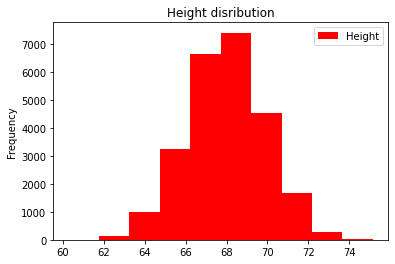

In [7]:
data.plot(kind="hist", y="Height", title="Height disribution", 
          color="red", xlabel="height", legend=True)

Weight distribution

<AxesSubplot:title={'center':'Weight distibution'}, ylabel='Frequency'>

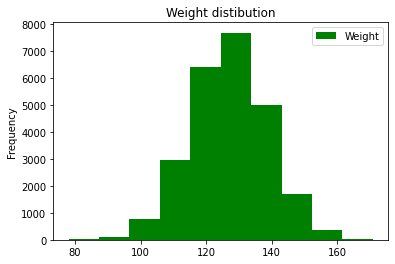

In [8]:
data.plot(kind='hist', y='Weight', title='Weight distibution',
         color='green')

Добавим индекс массы тела BMI

In [10]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [12]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], row['Weight']), axis=1)

In [23]:
data['Weight'].values

array([112.9925, 136.4873, 153.0269, ..., 118.2655, 132.2682, 124.874 ])

In [31]:
def error(x, y, w0, w1):
    return sum([(y[i] - (w0 + w1 * x[i])) ** 2 for i in range(len(x))])

def data_error(w0, w1):
    return error(data['Weight'].values, data['Height'].values, w0, w1)

x0 = np.array([0, 0])
error_opt = opt.minimize(data_error, x0, method='L-BFGS-B', bounds=((-100,100), (-5,5)))

TypeError: data_error() missing 1 required positional argument: 'w1'